# Visualize Logistic Regression
https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
#First, generate the data and fit the classifier to the training set:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])
X.shape
y.shape

/home/manjeet/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(200, 2)

(200,)

In [7]:
#Next, make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
xx.shape
yy.shape

probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
probs.shape

(1000, 1000)

(1000, 1000)

(1000, 1000)

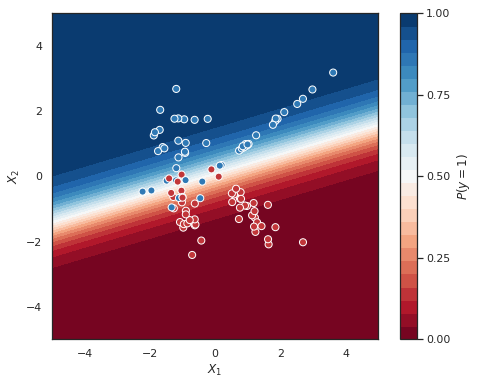

In [8]:
#Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:
f, ax = plt.subplots(figsize=(8, 6))
#25 levels of contour
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
_=ax_c.set_label("$P(y = 1)$")
_=ax_c.set_ticks([0, .25, .5, .75, 1])

_=ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

_=ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

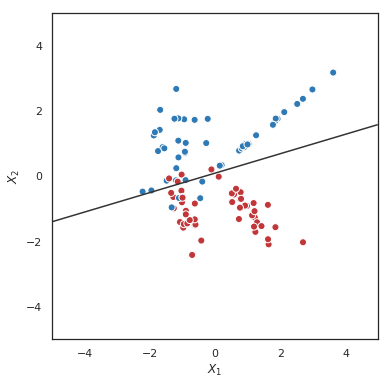

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
_=ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

_=ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

_=ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")